### 1. SVM and Margin
Figure 1 shows a set of data points and a decision boundary returned by SVM. For each data point (points 1, 2, 3, 4, 5), please answer:

##### 1) If the decision boundary will be changed if the data point is removed.

Point 1: Yes, the decision boundary $\textbf{will}$ change if the data point is removed.

Point 2: No, the decision boundary $\textbf{will not}$ change if the data point is removed.

Point 3: Yes, the decision boundary $\textbf{will}$ change if the data point is removed.

Point 4: No, the decision boundary $\textbf{will not}$ change if the data point is removed.

Point 5: No, the decision boundary $\textbf{will not}$ change if the data point is removed.

##### 2) Explain your answer with at most 2 sentence (for each data point).

Point 1: This point is a support vector, removing it will alter the margin and decision boundary.

Point 2: This point is a not a support vector, as it is inside of the decision boundary. Removing it will not change the position of the decision boundary.

Point 3: Since this point lies on the margin and is a support vector, removing it will cause the decision boundary to adjust.

Point 4: This point is not a support vector and does not contribute to defining the margin. Removing it will not affect the decision boundary.

Point 5: This point is far from the decision boundary and does not influence it. Removing it will not change the boundary.

### 2. Kernels
In this problem, we consider constructing new kernels by combining existing kernels. Recall that for some function $k(x, z)$ to be a kernel, we need to be able to write it as a dot product of vectors in some high-dimensional feature space defined by $\phi$:
$$
k(x, z) = \phi(x)^\top \phi(z)
$$
Mercer’s theorem gives a necessary and sufficient condition for a function $k$ to be a kernel function: its corresponding kernel matrix $K$ has to be symmetric and positive semidefinite. Suppose that $k_1(x, z)$ and $k_2(x, z)$ are two valid kernels. For each of the cases below, state whether k is also a valid kernel. If it is, prove it. If it is not, give a counterexample. You can use either Mercer’s theorem, or the definition of a kernel as needed to prove it (If you use any properties on page 10 of Lecture 8, we need to prove them first).

(a) $k(x, z) = a_1k_1(x, z) − a_2k_2(x, z)$, where $a_1, a_2 > 0$ are real numbers

Counterexample:
Let $k_1(x,z) = k_2(x,z) = x^\top z$ (linear kernel)
Choose $a_1 = 1$ and $a_2 = 2$
$$
k(x,z) = (1)(x^\top z) - (2)(x^\top z) = -x^\top z
$$
The corresponding kernel matrix for any set of distinct points ${x_1,x_2,...,x_n}$ will have negative eigenvalues. For example, with $x = [1]$ and $z = [1]$, the kernel matrix $K = [-1]$ is not positive semidefinite. Therefore, $k(x, z)$ is $\textbf{invalid}.$

(b) $k(x, z) = \sqrt{k_1(x, z)k_2(x, z)}$

Counterexample: Let $k_1(x,z) = x^\top z$ (linear kernel) and $k_2(x,z) = x^\top z - 2$. For $x = z = 1$.
$$
k_1(1,1) = 1, k_2(1,1) = 1 - 2 = -1
$$
$$
k(1,1) = \sqrt{(1)(-1)} = \sqrt{-1}
$$
The result is imaginary, violating the requirement that kernels be real-valued. Therefore, $k(x,z)$ is $\textbf{invalid}$.

(c) If $k(x, z) = e^{\frac{x^\top z}{\sigma^2}}$ is a valid kernel, prove that the Gaussian kernel $k(x, z) = e^{-\frac{\|x - z\|^2_2}{2\sigma^2}}$ is also a valid kernel.

Proof: Starting with the given kernel $k_0(x, z) = e^{\frac{x^\top z}{\sigma^2}}$, we can rewrite the Gaussian kernel as
$$
k(x, z) = e^{-\frac{\|x - z\|_2^2}{2\sigma^2}} = e^{-\frac{\|x\|_2^2 + \|z\|_2^2 - 2x^\top z}{2\sigma^2}}
$$
Factorizing the terms:
$$
k(x, z) = \underbrace{e^{-\frac{\|x\|_2^2}{2\sigma^2}}}_{c(x)} \cdot \underbrace{e^{-\frac{\|z\|_2^2}{2\sigma^2}}}_{c(z)} \cdot \underbrace{e^{\frac{x^\top z}{\sigma^2}}}_{k_0(x, z)}.
$$
Let $c(x) = e^{-\frac{\|x\|_2^2}{2\sigma^2}}$, then
$$
k(x, z) = c(x) c(z) k_0(x, z)
$$
$c(x)c(z)$ is a valid kernel because it is the outer product of the function $c(x)$, which is a valid kernel.

$k_0$ is also a valid kernel by assumption.

The product of $2$ valid kernels $c(x)c(z)$ and $k_0(x,z)$ is also a valid kernel.

Therefore, $k(x,z)$ is $\textbf{valid}$.

$\textbf{Summarized: a = not valid kernel, b = not valid kernel, c = valid kernel.}$

Definition of a kernel: A function $k(x,z)$ is a valid kernel if and only if it is symmetric and the corresponding kernel matrix $K$ is positive semidefinite for any set of inputs.

For $a$ and $b$, I used the definiton of a kernel, (positive semidefiniteness and real-valuedness) to create counterexamples.

For $c$, I used the definiton of a kernel and the property that the product of valid kernels is valid.

### 3. PCA and Eigenface
For this exercise, you will use principal component analysis (PCA) to analyze face images in any programming language of your choice (e.g., Python/Matlab/R). The data set faces.dat; each row represents an image (400 images), and each column represents a pixel (64 × 64 = 4096 pixels).

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
data = np.loadtxt('faces.dat')

(a) Display the 200th image.

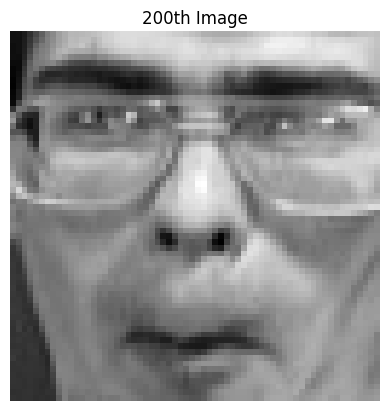

In [28]:
plt.imshow(np.rot90(data[199].reshape(64, 64), k=-1), cmap='gray')
plt.title("200th Image")
plt.axis('off')
plt.show()

(b) Remove the mean of the images, and then display the 100th image

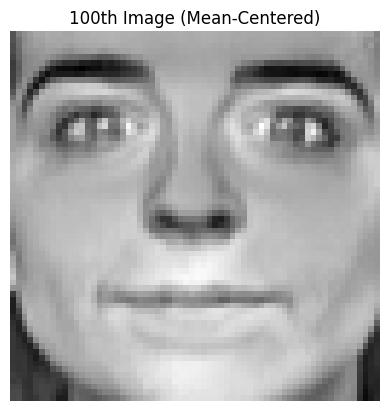

In [29]:
mean_face = np.mean(data, axis=0)
mean_centered_data = data - mean_face

plt.imshow(np.rot90(mean_centered_data[99].reshape(64, 64), k=-1), cmap='gray')
plt.title("100th Image (Mean-Centered)")
plt.axis('off')
plt.show()

(c) Perform PCA on the mean-centered data matrix. You can either implement PCA by yourself using eigenvalue decomposition over the sample covariance matrix, or use a existing
machine learning toolbox. Sort the eigenvalues in a descending order and plot them.

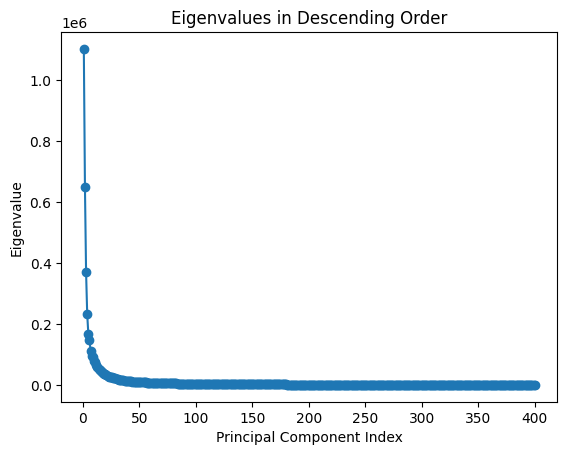

In [30]:
pca = PCA()
pca.fit(mean_centered_data)

eigenvalues = pca.explained_variance_
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.title("Eigenvalues in Descending Order")
plt.xlabel("Principal Component Index")
plt.ylabel("Eigenvalue")
plt.show()

(d) You will find the last (i.e., 400th) eigenvalue is 0. Explain why

The 400th eigenvalue is 0 because the dataset consists of 400 images, meaning the covariance matrix has at most 399 nonzero eigenvalues.

(e) Based on the eigenvalues, determine the dimensionality of the data you want to keep (i.e., how many principal components you want to keep), which accounts for most of the variance. Explain your reason.

In [31]:
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

k = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of principal components to retain: {k}")

Number of principal components to retain: 123


The optimal number of principal components to keep is 123, as this retains 95% of the total variance in the data. This choice balances dimensionality reduction and information retention, ensuring that we preserve most of the facial structure while removing noise and redundant details.

(f) Display the top-5 leading eigenvectors (corresponding to the top-5 largest eigenvalues) in 5 figures.


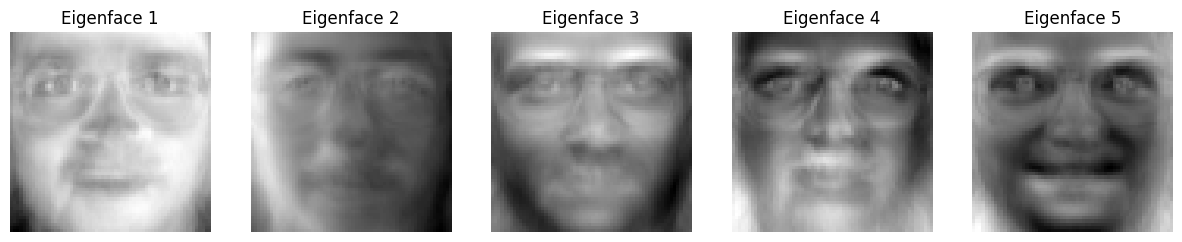

In [32]:
fig, axes = plt.subplots(1, 5, figsize=(15, 5))
for i in range(5):
    axes[i].imshow(pca.components_[i].reshape(64, 64).T, cmap='gray')
    axes[i].set_title(f"Eigenface {i+1}")
    axes[i].axis('off')
plt.show()

(g) Display, respectively, the reconstructed 100th images using 10, 100, 200, and 399 principal components. (Hint: In Lecture 9 (page 19), we have learned that $x = v v^\top x$ if we project $x$ into 1-dimensional space using the 1st principal component. Reconstructed $\hat{x}$ using top-$K$ principal components is a straightforward extension: $\hat{x} = \sum_{k=1}^{K} v_k v_k^\top x$

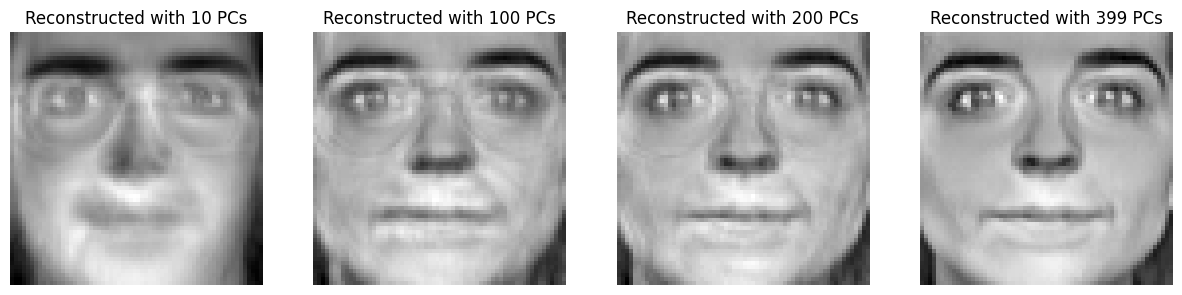

In [33]:
num_components = [10, 100, 200, 399]
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for i, k in enumerate(num_components):
    pca_k = PCA(n_components=k)
    pca_k.fit(mean_centered_data)  
    projected = pca_k.transform(mean_centered_data[99].reshape(1, -1))
    reconstructed = pca_k.inverse_transform(projected)

    axes[i].imshow(reconstructed.reshape(64, 64).T, cmap='gray')
    axes[i].set_title(f"Reconstructed with {k} PCs")
    axes[i].axis("off")

plt.show()